In [17]:
%matplotlib inline
from sklearn.linear_model import LinearRegression #sklearn.linear_model contains all LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels as sms
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# pip install BorutaShap
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import random
import math 

In [18]:
data = pd.read_csv("Life Expectancy Data.csv", header=0) 
df= data.copy()
df = df.dropna()   
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

<AxesSubplot:xlabel='Life expectancy ', ylabel='Count'>

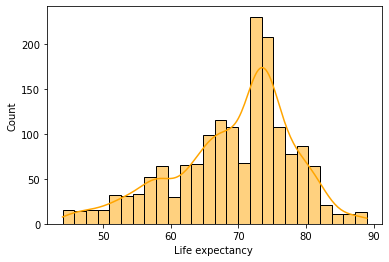

In [20]:
sns.histplot(df['Life expectancy '].dropna(), kde=True, color='orange')

In [21]:
np.mean(df["Life expectancy "])

69.30230442692543

In [22]:
#pd.get_dummies(data, columns = ["Status"], drop_first = True).head(1000)

In [23]:
df.drop(["Country", "Status","Year"], axis=1, inplace=True)  
df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


The country,status and year columns were removed because the project did not attempt to see if a country's life expectancy changed from year to year. The country and year from which the data is sourced should not be used as predictors of life expectancy. Country is also a high cardinality feature and will not have any impact on life expectancy predictions

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  1649 non-null   float64
 1   Adult Mortality                  1649 non-null   float64
 2   infant deaths                    1649 non-null   int64  
 3   Alcohol                          1649 non-null   float64
 4   percentage expenditure           1649 non-null   float64
 5   Hepatitis B                      1649 non-null   float64
 6   Measles                          1649 non-null   int64  
 7    BMI                             1649 non-null   float64
 8   under-five deaths                1649 non-null   int64  
 9   Polio                            1649 non-null   float64
 10  Total expenditure                1649 non-null   float64
 11  Diphtheria                       1649 non-null   float64
 12   HIV/AIDS           

In [25]:
print(df.isnull().any())

Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
 BMI                               False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
 HIV/AIDS                          False
GDP                                False
Population                         False
 thinness  1-19 years              False
 thinness 5-9 years                False
Income composition of resources    False
Schooling                          False
dtype: bool


# Correlation Plots


That being said, correlation can be useful for pointing us in the direction of multicollinearity They can also be useful as a tool for familiarizing us with our data
As such it may be desirable to generate correlation plots, which visually represent the pairwise correlations between all of our variables

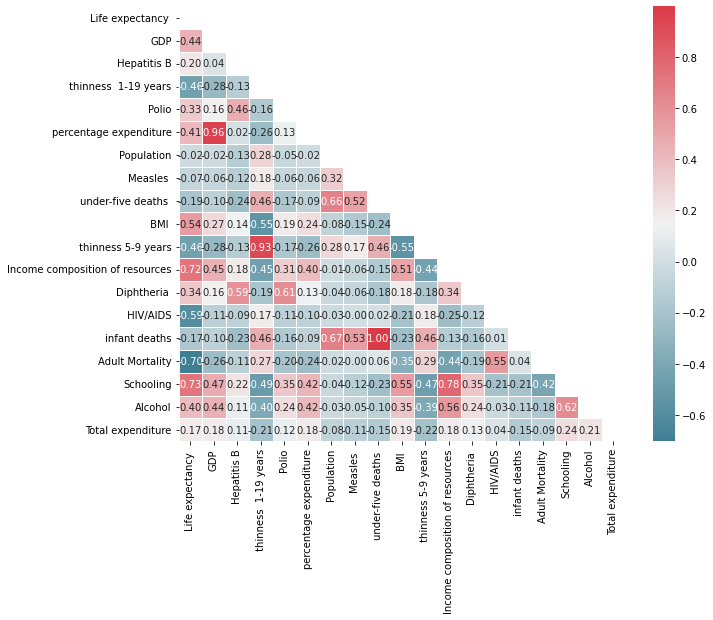

In [26]:
sub_df =  df[['Life expectancy ','GDP','Hepatitis B', ' thinness  1-19 years', 'Polio', 'percentage expenditure', 'Population', 'Measles ', 'under-five deaths ', ' BMI ', ' thinness 5-9 years', 'Income composition of resources', 'Diphtheria ', ' HIV/AIDS', 'infant deaths', 'Adult Mortality', 'Schooling', 'Alcohol', 'Total expenditure']]
corr = sub_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = colormap, linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

# Scatter Plots


Let's take a broad look at our data and get a view of the important relationships within our data This can help us identify some non-linearities (although there are better ways to identify these relationships)

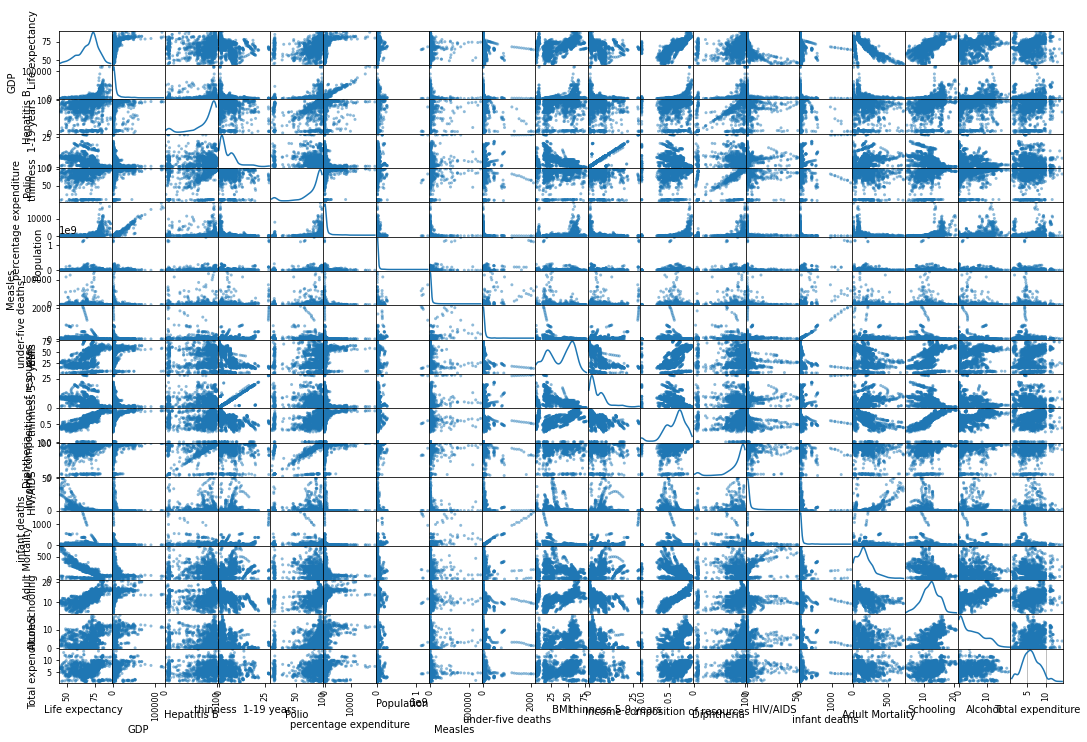

In [27]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df[['Life expectancy ','GDP','Hepatitis B', ' thinness  1-19 years', 'Polio', 'percentage expenditure', 'Population', 'Measles ', 'under-five deaths ', ' BMI ', ' thinness 5-9 years', 'Income composition of resources', 'Diphtheria ', ' HIV/AIDS', 'infant deaths', 'Adult Mortality', 'Schooling', 'Alcohol', 'Total expenditure']],
               figsize = (18, 12), diagonal = 'kde')
plt.grid()

In [28]:
x = df.iloc[:,1:19]
y = df['Life expectancy ']

In [38]:

from BorutaShap import BorutaShap
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor

  0%|          | 0/50 [00:00<?, ?it/s]

17 attributes confirmed important: ['Income composition of resources', 'Schooling', 'Adult Mortality', 'Polio', ' BMI ', 'GDP', 'Population', 'under-five deaths ', ' thinness  1-19 years', 'Diphtheria ', ' thinness 5-9 years', 'Measles ', 'infant deaths', 'percentage expenditure', 'Alcohol', ' HIV/AIDS', 'Total expenditure']
1 attributes confirmed unimportant: ['Hepatitis B']
0 tentative attributes remains: []


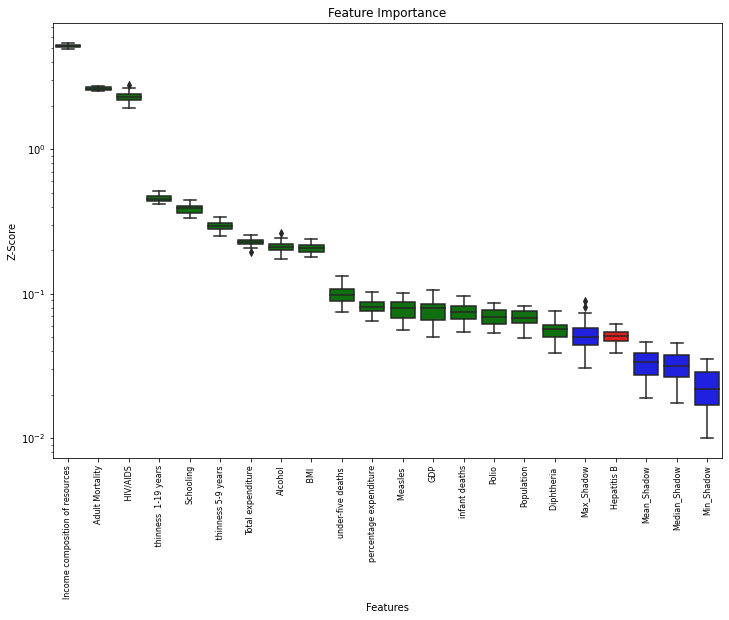

In [39]:
Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
Feature_Selector.fit(X=x, y=y, n_trials=50, random_state=0)
Feature_Selector.plot(which_features='all')

In [40]:
Feature_Selector.Subset()

,Income composition of resources,Schooling,Adult Mortality,Polio,BMI,GDP,Population,under-five deaths,thinness 1-19 years,Diphtheria,thinness 5-9 years,Measles,infant deaths,percentage expenditure,Alcohol,HIV/AIDS,Total expenditure
0,0.479,10.1,263.0,6.0,19.1,584.259210,33736494.0,83,17.2,65.0,17.3,1154,62,71.279624,0.01,0.1,8.16
1,0.476,10.0,271.0,58.0,18.6,612.696514,327582.0,86,17.5,62.0,17.5,492,64,73.523582,0.01,0.1,8.18
2,0.470,9.9,268.0,62.0,18.1,631.744976,31731688.0,89,17.7,64.0,17.7,430,66,73.219243,0.01,0.1,8.13
3,0.463,9.8,272.0,67.0,17.6,669.959000,3696958.0,93,17.9,67.0,18.0,2787,69,78.184215,0.01,0.1,8.52
4,0.454,9.5,275.0,68.0,17.2,63.537231,2978599.0,97,18.2,68.0,18.2,3013,71,7.097109,0.01,0.1,7.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0.407,9.2,723.0,67.0,27.1,454.366654,12777511.0,42,9.4,65.0,9.4,31,27,0.000000,4.36,33.6,7.13
2934,0.418,9.5,715.0,7.0,26.7,453.351155,12633897.0,41,9.8,68.0,9.9,998,26,0.000000,4.06,36.7,6.52
2935,0.427,10.0,73.0,73.0,26.3,57.348340,125525.0,40,1.2,71.0,1.3,304,25,0.000000,4.43,39.8,6.53
2936,0.427,9.8,686.0,76.0,25.9,548.587312,12366165.0,39,1.6,75.0,1.7,529,25,0.000000,1.72,42.1,6.16


In [70]:
# Fitting a linear regression model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [71]:
# Specify the Model
x_train = sm.add_constant(X_train)

# Fit the Model
ols_fit = sm.OLS(y_train,x_train).fit()
# Type: dir(ols_fit) to look at other accessible attributes

# Look at the Model Fit Summary
ols_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     373.9
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:39:58   Log-Likelihood:                -3317.7
No. Observations:                1236   AIC:                             6671.
Df Residuals:                    1218   BIC:                             6763.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              52.7678      0.838     62.959      0.000      51.123      54.412
Adult Mortality                    -0.0168      0.001    -15.696      0.000      -0.019      -0.015
infant deaths                       0.0977      0.012      8.134      0.000       0.074       0.121
Alcohol                            -0.0964      0.035     -2.771      0.006      -0.165      -0.028
percentage expenditure              0.0005      0.000      2.392      0.017    9.16e-05       0.001
Measles                         -9.687e-06    1.2e-05     -0.804      0.421   -3.33e-05    1.39e-05
 BMI                                0.0231      0.007      3.410      0.001       0.010       0.036
under-five deaths                  -0.0730      0.009     -8.308      0.000      -0.090      -0.056
Polio                               0.0059      0.006      1.014      0.311      -0.005       0.017
Total expenditure                   0.1081      0.046      2.334      0.020       0.017       0.199
Diphtheria                          0.0111      0.006      1.782      0.075      -0.001       0.023
 HIV/AIDS                          -0.4274      0.020    -21.769      0.000      -0.466      -0.389
GDP                             -1.738e-05   3.38e-05     -0.514      0.608   -8.37e-05     4.9e-05
Population                       1.602e-10   2.23e-09      0.072      0.943   -4.22e-09    4.54e-09
 thinness  1-19 years              -0.0447      0.057     -0.779      0.436      -0.157       0.068
 thinness 5-9 years                -0.0570      0.057     -1.008      0.313      -0.168       0.054
Income composition of resources     8.6999      0.886      9.815      0.000       6.961      10.439
Schooling                           1.0268      0.067     15.240      0.000       0.895       1.159
==============================================================================
Omnibus:                       28.376   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.068
Skew:                          -0.166   Prob(JB):                     2.21e-11
Kurtosis:                       3.918   Cond. No.                     5.83e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score


# Perform an OLS fit using all the data
regr = LinearRegression()
model = regr.fit(x,y)
regr.coef_
regr.intercept_

# Split the data into train  (70%)/test(30%) samples:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Train the model:
regr = LinearRegression()
regr.fit(x_train, y_train)

# Make predictions based on the test sample
y_pred = regr.predict(x_test)

# Evaluate Performance

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Perform a 5-fold CV
# Use MSE as the scoring function (there are other options as shown here:
# https://scikit-learn.org/stable/modules/model_evaluation.html

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, x, y, cv=5, scoring='neg_root_mean_squared_error')
print('5-Fold CV MSE Scores:', scores)

MAE: 2.7764597924612877
MSE: 13.235575144052603
RMSE: 3.638072998725095
5-Fold CV MSE Scores: [-3.80685546 -3.80176742 -3.76777445 -3.8851524  -4.25823065]


# Variance Inflation Factor

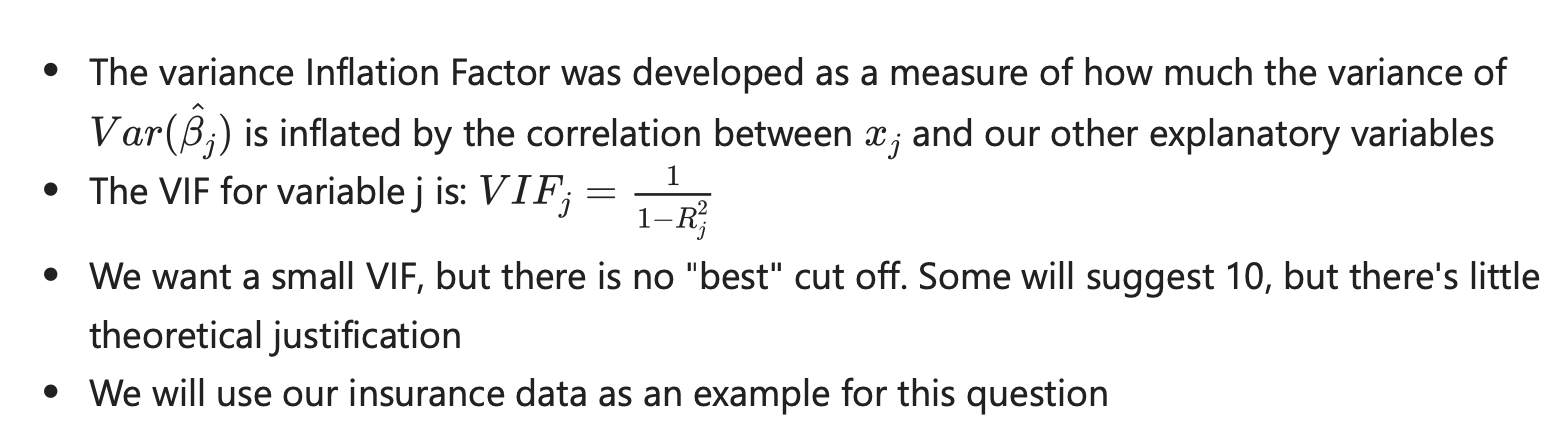

In [73]:
from IPython.display import Image 
Image("9.52.47.png")

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF dataframe
pd.Series([variance_inflation_factor(x_train.values, i)
for i in range(x_train.shape[1])], index=x_train.columns)

Adult Mortality                      4.388668
infant deaths                      210.860851
Alcohol                              3.882615
percentage expenditure              15.916591
Measles                              1.577663
 BMI                                 8.827290
under-five deaths                  193.433809
Polio                               23.207676
Total expenditure                    8.348256
Diphtheria                          26.214184
 HIV/AIDS                            1.622873
GDP                                 17.708910
Population                           2.483985
 thinness  1-19 years               13.895255
 thinness 5-9 years                 13.895438
Income composition of resources     34.274832
Schooling                           53.714148
dtype: float64

In [135]:
x = df.iloc[:,1:18]
y = df['Life expectancy ']

# QQ Plot (Normal Probability) 

In most cases where confidence intervals or significance levels are calculated, we assume normality
If this assumption fails, our confidence intervals, and significance tests may be very misleading There are formal tests of normality (see Kolmogorov-Smirnov and Shapiro-Wilk tests). These may fail in certain cases.
Visual inspection is a fast way to validate this assumption via a quantile-quantile plot To use a q-q plot use must normalize your residuals before plotting

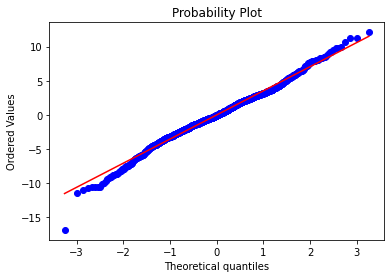

In [46]:
import scipy as sp
figA, axA = plt.subplots(figsize=(6,4))
_, (__, ___, r) = sp.stats.probplot(ols_fit.resid, plot = axA, fit=True)

 A normal distiribution, half of the data is above or below the median (0)

# Detecting Heteroscedasticity: Breusch-Pagan (BP) Test

In [78]:
# Heteroskedasticity: Breush-Pagan --> Ho: var = constant
import statsmodels.stats.api as sms
from simple_colors import *
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(ols_fit.resid, ols_fit.model.exog)
print(blue("BP Results:",['bold']))
print(list(zip(name, test)))
#With such a low p-value, we would reject the null hypothesis and try to account for the heteroscedasticity in our model.

BP Results:
[('Lagrange multiplier statistic', 120.70057470702885), ('p-value', 1.1340146452670996e-17), ('f-value', 7.753829133191437), ('f p-value', 1.1385727714228391e-18)]


# Addressing Heteroscedasticity: Robust Standard Errors

In [79]:
modelhc0 = sm.OLS(y, sm.add_constant(x)).fit(cov_type = 'HC0') 
modelhc0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     416.9
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:43:56   Log-Likelihood:                -4441.4
No. Observations:                1649   AIC:                             8919.
Df Residuals:                    1631   BIC:                             9016.
Df Model:                          17                                         
Covariance Type:                  HC0                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              53.2205      0.869     61.275      0.000      51.518      54.923
Adult Mortality                    -0.0169      0.001    -12.984      0.000      -0.019      -0.014
infant deaths                       0.0940      0.012      8.121      0.000       0.071       0.117
Alcohol                            -0.0532      0.031     -1.732      0.083      -0.113       0.007
percentage expenditure              0.0004      0.000      2.886      0.004       0.000       0.001
Measles                          -8.38e-06   6.88e-06     -1.219      0.223   -2.19e-05     5.1e-06
 BMI                                0.0331      0.006      5.401      0.000       0.021       0.045
under-five deaths                  -0.0706      0.009     -8.159      0.000      -0.088      -0.054
Polio                               0.0068      0.005      1.303      0.193      -0.003       0.017
Total expenditure                   0.0775      0.049      1.567      0.117      -0.019       0.175
Diphtheria                          0.0112      0.006      1.960      0.050    2.63e-08       0.022
 HIV/AIDS                          -0.4372      0.027    -16.206      0.000      -0.490      -0.384
GDP                              1.277e-05   1.94e-05      0.659      0.510   -2.52e-05    5.07e-05
Population                      -6.346e-10   1.36e-09     -0.467      0.641    -3.3e-09    2.03e-09
 thinness  1-19 years              -0.0105      0.048     -0.221      0.825      -0.104       0.083
 thinness 5-9 years                -0.0512      0.047     -1.081      0.280      -0.144       0.042
Income composition of resources     9.8478      1.210      8.139      0.000       7.476      12.219
Schooling                           0.8771      0.069     12.766      0.000       0.742       1.012
==============================================================================
Omnibus:                       39.378   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.288
Skew:                          -0.154   Prob(JB):                     1.22e-16
Kurtosis:                       3.986   Cond. No.                     7.00e+08
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large,  7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [188]:
# Linear regression model with raw data
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_:", lr.coef_)

lr.coef_: [-1.75567054e-02  8.16177704e-02 -5.47990985e-02  4.53888311e-04
 -2.76093288e-06  4.12379291e-02 -6.12655516e-02  7.76256492e-03
  8.17624544e-02  1.17178303e-02 -4.38429030e-01  4.07644143e-06
 -9.56693891e-10  2.85361112e-03 -2.61962299e-02  9.26693068e+00
  9.25166955e-01]


In [189]:
# Coefficients
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

# y = - 0.031804 + 0.39390555*x

lr.coef_: [-1.75567054e-02  8.16177704e-02 -5.47990985e-02  4.53888311e-04
 -2.76093288e-06  4.12379291e-02 -6.12655516e-02  7.76256492e-03
  8.17624544e-02  1.17178303e-02 -4.38429030e-01  4.07644143e-06
 -9.56693891e-10  2.85361112e-03 -2.61962299e-02  9.26693068e+00
  9.25166955e-01]
lr.intercept_: 52.453806164356585


In [80]:
# Heteroskedasticity: Breush-Pagan --> Ho: var = constant
import statsmodels.stats.api as sms
from simple_colors import *
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(modelhc0.resid, modelhc0.model.exog)
print(blue("BP Results:",['bold']))
print(list(zip(name, test)))
#With such a low p-value, we would reject the null hypothesis and try to account for the heteroscedasticity in our model.

BP Results:
[('Lagrange multiplier statistic', 180.98931640705584), ('p-value', 1.833409234946076e-29), ('f-value', 11.828475186707381), ('f p-value', 2.323457997818637e-31)]


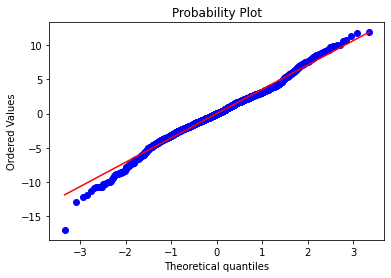

In [187]:
import scipy as sp
figA, axA = plt.subplots(figsize=(6,4))
_, (__, ___, r) = sp.stats.probplot(modelhc0.resid, plot = axA, fit=True)

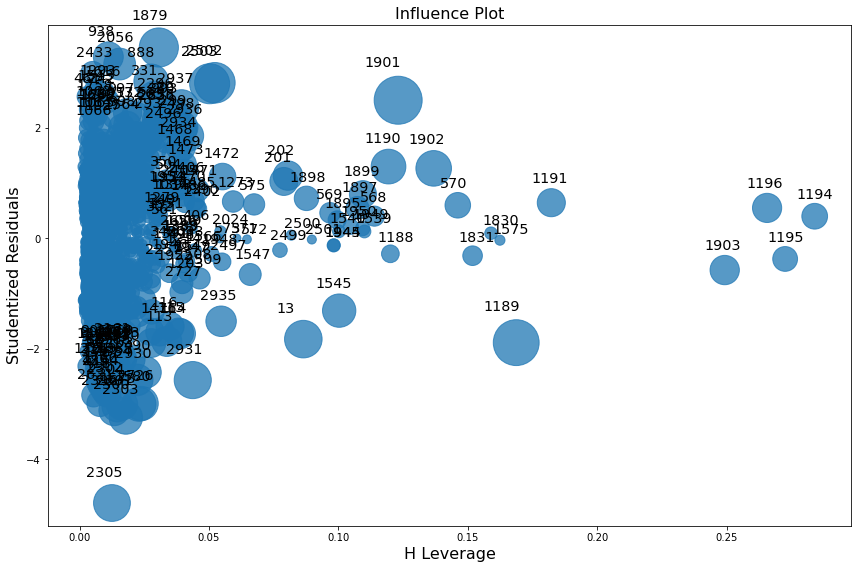

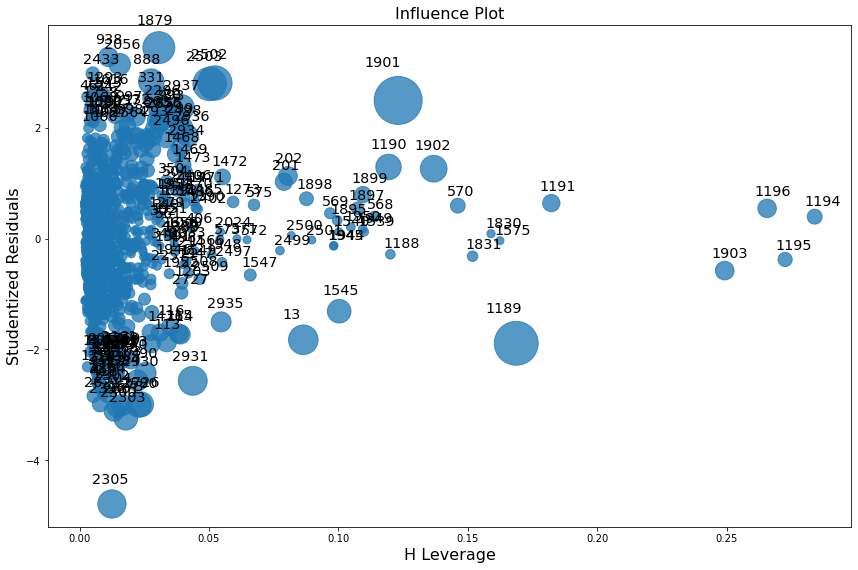

In [81]:
# Outliers, high leverage, influential obs
figd, ax = plt.subplots(figsize=(12,8))
figd = sm.graphics.influence_plot(ols_fit, ax = ax, criterion="DFFITS")
figd.tight_layout(pad=1.0)

fige, ax = plt.subplots(figsize=(12,8))
fige = sm.graphics.influence_plot(ols_fit, ax = ax, criterion="cooks")
fige.tight_layout(pad=1.0)

# Model Specification: Ramsey RESET

The Ramsey RESET test is a general test of functional form misspecification
#Remember, the intercept only model is just the sample mean
Suppose we have a model:
Now let represent the fitted values estimated from running the above regression We can then add polynomials in the to test for nonlinear functions of our predictors We can use the expanded equation;to test whether any quadratic combinations of our predictors may be appropriate -RESET is the F statistic from testing

In [82]:
sm.stats.diagnostic.linear_reset(ols_fit,power=2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=40.660864669805086, p-value=1.8107763590627433e-10, df_denom=1>

statsmodels has a convenient implementation of the RESET test
At a p-value far less than .05, we will reject the null and conclude some nonlinear function of our predictor variables will likely improve our model
Note: RESET does not tell us how to improve our model, so what do we include?
The source of our problem could be a squared or even interaction term
The problem is compounded if we use a cubic RESET test (we typically don't go higher than cubic tests)

In [190]:
x2 = x**2

In [191]:
# Fitting a linear regression model
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y, random_state=42)

In [194]:
# Specify the Model
x_train2 = sm.add_constant(X_train2)

# Fit the Model
ols_fit2 = sm.OLS(y_train2,x_train2).fit()
# Type: dir(ols_fit) to look at other accessible attributes

# Look at the Model Fit Summary
ols_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                      -2.329
Model:                            OLS   Adj. R-squared:                 -2.353
Method:                 Least Squares   F-statistic:                    -95.30
Date:                Sat, 19 Mar 2022   Prob (F-statistic):               1.00
Time:                        17:12:40   Log-Likelihood:                -5190.3
No. Observations:                1236   AIC:                         1.040e+04
Df Residuals:                    1226   BIC:                         1.045e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            6.775e-05   5.12e-06     13.233      0.000    5.77e-05    7.78e-05
Adult Mortality                  5.716e-05   7.99e-06      7.151      0.000    4.15e-05    7.28e-05
infant deaths                      -0.0002   4.79e-05     -3.198      0.001      -0.000   -5.93e-05
Alcohol                            -0.0056      0.000    -12.782      0.000      -0.006      -0.005
percentage expenditure          -5.932e-08   8.44e-08     -0.703      0.482   -2.25e-07    1.06e-07
Measles                          1.656e-09   5.29e-10      3.133      0.002    6.19e-10    2.69e-09
 BMI                                0.0069      0.000     19.764      0.000       0.006       0.008
under-five deaths                7.348e-05   2.64e-05      2.788      0.005    2.18e-05       0.000
Polio                               0.0023      0.000      8.877      0.000       0.002       0.003
Total expenditure                   0.0014      0.000     12.989      0.000       0.001       0.002
Diphtheria                          0.0040      0.000     15.145      0.000       0.003       0.004
 HIV/AIDS                          -0.0132      0.002     -5.617      0.000      -0.018      -0.009
GDP                              2.406e-09   2.07e-09      1.164      0.245   -1.65e-09    6.46e-09
Population                       9.831e-18   1.24e-17      0.794      0.427   -1.44e-17    3.41e-17
 thinness  1-19 years               0.0429      0.003     12.719      0.000       0.036       0.049
 thinness 5-9 years                 0.0439      0.003     12.700      0.000       0.037       0.051
Income composition of resources -2.484e-06   2.31e-07    -10.769      0.000   -2.94e-06   -2.03e-06
Schooling                        5.441e-05   1.24e-05      4.405      0.000    3.02e-05    7.86e-05
==============================================================================
Omnibus:                      117.685   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.216
Skew:                           0.766   Prob(JB):                     7.26e-35
Kurtosis:                       3.841   Cond. No.                     7.33e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.33e+17. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
sm.stats.diagnostic.linear_reset(ols_fit2,power=2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=3736.2726450847795, p-value=0.0, df_denom=1>

# R_squared-OLS

In [86]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.83
Test set score: 0.85


The test score of determination R-square came out to be closer to 1, which indicates the model mostly predicts the Life expectancies. This implies that the linear model works well.


# R_squared-OLS-HIGH ORDER2

In [199]:
print("Training set score: {:.2f}".format(lr.score(X_train2, y_train2)))
print("Test set score: {:.2f}".format(lr.score(X_test2, y_test2)))

Training set score: -52179504849412.46
Test set score: -131054257968238.34


# MSE-OLS

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

predicted_test = lr.predict(X_test) 
mean_squared_error(y_test, predicted_test)

12.610055371871734

# MSE-OLS-HIGH ORDER 2

In [201]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

predicted_test2 = lr.predict(X_test2) 
mean_squared_error(y_test2, predicted_test2)

9803856548777240.0


# Linear regression model with scaled features

In [147]:
X_scaled = MinMaxScaler().fit_transform(x)

In [148]:
print("Data shape: {}".format(X_scaled.shape))

Data shape: (1649, 17)


In [149]:
X_scaled

array([[0.36288089, 0.03875   , 0.        , ..., 0.61209964, 0.51175214,
        0.35757576],
       [0.37396122, 0.04      , 0.        , ..., 0.61921708, 0.50854701,
        0.35151515],
       [0.36980609, 0.04125   , 0.        , ..., 0.62633452, 0.50213675,
        0.34545455],
       ...,
       [0.09972299, 0.015625  , 0.2474804 , ..., 0.04270463, 0.45619658,
        0.35151515],
       [0.94875346, 0.015625  , 0.09574468, ..., 0.0569395 , 0.45619658,
        0.33939394],
       [0.91966759, 0.015     , 0.09350504, ..., 0.39501779, 0.46367521,
        0.33939394]])

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_)

lr.coef_: [-1.26759413e+01  1.30588433e+02 -9.78711898e-01  8.60633450e+00
 -3.62899780e-01  3.09696847e+00 -1.28657658e+02  7.45206232e-01
  1.11605750e+00  1.13662954e+00 -2.21406660e+01  4.85793847e-01
 -1.23782725e+00  7.73328613e-02 -7.36114060e-01  8.67384712e+00
  1.52652548e+01]


In [151]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.83
Test set score: 0.85


In [152]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

predicted_test = lr.predict(X_test) 
mean_squared_error(y_test, predicted_test)

12.610055372002506

# Ridge

In [161]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.82
Test set score: 0.83


In [162]:
# Ridge regression with alpha =10 
ridge100 = Ridge(alpha=100).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.63
Test set score: 0.63


In [163]:
# Ridge regression with alpha =10 
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.82


In [164]:
# Ridge regression with alphaa=0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.82
Test set score: 0.84


In [165]:
# Ridge regression with alphaa=0.1
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge001.score(X_test, y_test)))

Training set score: 0.83
Test set score: 0.84


In [166]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

predicted_test = ridge.predict(X_test) 
mean_squared_error(y_test, predicted_test)

13.699785747742697

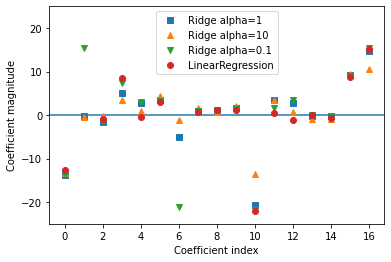

In [167]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

In [175]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso01 = Lasso(alpha=0.1, max_iter=500000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))



Training set score: 0.80
Test set score: 0.81
Number of features used: 7


In [176]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))



Training set score: 0.82
Test set score: 0.83
Number of features used: 13


In [177]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.83
Test set score: 0.85
Number of features used: 17


In [178]:
lasso1 = Lasso(alpha=1, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.83
Test set score: 0.85
Number of features used: 17


Text(0, 0.5, 'Coefficient magnitude')

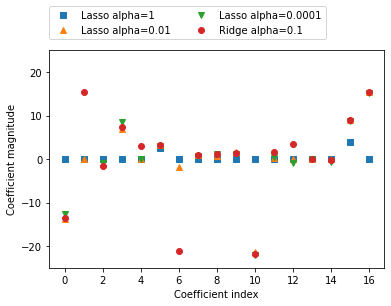

In [179]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [180]:
from sklearn.linear_model import ElasticNetCV
ENet = ElasticNetCV(cv=5, random_state=0)
ENet.fit(x, y)
print("Training set score: {:.2f}".format(ENet.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ENet.score(X_test, y_test)))
print("Number of features used:", np.sum(ENet.coef_ != 0))

Training set score: -0.02
Test set score: -0.03
Number of features used: 2


In [186]:
from sklearn.linear_model import ElasticNetCV
ENet = ElasticNetCV(cv=50, random_state=24)
ENet.fit(x, y)
print("Training set score: {:.2f}".format(ENet.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ENet.score(X_test, y_test)))
print("Number of features used:", np.sum(ENet.coef_ != 0))

Training set score: -0.02
Test set score: -0.03
Number of features used: 2


# Logistic Model

In [113]:
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.linear_model import LinearRegression #sklearn.linear_model contains all LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

import statsmodels.api as sm
import statsmodels as sms
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Life expectancy,1649.0,6.930230e+01,8.796834e+00,44.00000,64.400000,7.170000e+01,7.500000e+01,8.900000e+01
Adult Mortality,1649.0,1.682153e+02,1.253104e+02,1.00000,77.000000,1.480000e+02,2.270000e+02,7.230000e+02
infant deaths,1649.0,3.255306e+01,1.208472e+02,0.00000,1.000000,3.000000e+00,2.200000e+01,1.600000e+03
Alcohol,1649.0,4.533196e+00,4.029189e+00,0.01000,0.810000,3.790000e+00,7.340000e+00,1.787000e+01
percentage expenditure,1649.0,6.989736e+02,1.759229e+03,0.00000,37.438577,1.451023e+02,5.093900e+02,1.896135e+04
Measles,1649.0,2.224494e+03,1.008580e+04,0.00000,0.000000,1.500000e+01,3.730000e+02,1.314410e+05
BMI,1649.0,3.812862e+01,1.975425e+01,2.00000,19.500000,4.370000e+01,5.580000e+01,7.710000e+01
under-five deaths,1649.0,4.422013e+01,1.628980e+02,0.00000,1.000000,4.000000e+00,2.900000e+01,2.100000e+03
Polio,1649.0,8.356458e+01,2.245056e+01,3.00000,81.000000,9.300000e+01,9.700000e+01,9.900000e+01
Total expenditure,1649.0,5.955925e+00,2.299385e+00,0.74000,4.410000,5.840000e+00,7.470000e+00,1.439000e+01


In [115]:
X=sub_df
y= [1 if i>63.2 else 0 for i in df.iloc[:,0]]
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [116]:
clf = LogisticRegression()
# call the function fit() to train the class instance
clf.fit(x_train,y_train)
logReg=clf.fit(x_train,y_train)

In [117]:
y_pred_prob = logReg.predict_proba(x_test)
yHat = (y_pred_prob >= 0.5).astype(int)
y_pred = y_pred_prob[:,1]

In [118]:
from sklearn.metrics import roc_curve, auc
def plot_roc(prob,model_name):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,prob,pos_label=1)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title("ROC of "+ model_name)
    plt.ylabel('alse_positive_rate')
    plt.xlabel('true_positive_rate')
    plt.show()

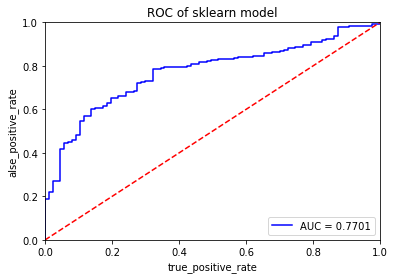

In [119]:
plot_roc(y_pred,'sklearn model')

In [120]:
accuracy_score(y_test, y_pred.round())

0.7893462469733656

In [121]:
def efron_rsquare(y_test, y_pred):
    n = float(len(y_test))
    t1 = np.sum(np.power(y_test - y_pred, 2.0))
    t2 = np.sum(np.power((y_test - (np.sum(y_test) / n)), 2.0))
    return 1.0 - (t1 / t2)

In [122]:
efron_rsquare(y_test, y_pred)

0.13530871823916812

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
y_pred2=knn.predict(x_test)
np.mean(y_pred2==y_test)

0.7699757869249395

In [125]:
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(x_train,y_train)
y_pred3=knn.predict(x_test)
np.mean(y_pred3==y_test)

0.7893462469733656

In [126]:
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(x_train,y_train)
y_pred4=knn.predict(x_test)
np.mean(y_pred4==y_test)

0.7893462469733656

In [127]:
knn=KNeighborsClassifier(n_neighbors=200)
knn.fit(x_train,y_train)
y_pred5=knn.predict(x_test)
np.mean(y_pred5==y_test)

0.7893462469733656

In [128]:
knn=KNeighborsClassifier(n_neighbors=400)
knn.fit(x_train,y_train)
y_pred8=knn.predict(x_test)
np.mean(y_pred8==y_test)

0.7893462469733656

In [129]:
knn=KNeighborsClassifier(n_neighbors=600)
knn.fit(x_train,y_train)
y_pred6=knn.predict(x_test)
np.mean(y_pred6==y_test)

0.7893462469733656

In [130]:
knn=KNeighborsClassifier(n_neighbors=800)
knn.fit(x_train,y_train)
y_pred7=knn.predict(x_test)
np.mean(y_pred7==y_test)

0.7893462469733656

In [131]:
from sklearn.metrics import r2_score

In [132]:
# logit
r2_score(y_test, y_pred)

0.13530871823916812

In [133]:
#KNN
r2_score(y_test, y_pred3)

-0.2668711656441718